In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os
import matplotlib.colors as mcolors

def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

In [2]:
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'

lonlat_path = f'{h08dir}/wsi/dat/population/population_m3cy_citylonlat.npy'
citylonlat = np.load(lonlat_path)

population_path = f'{h08dir}/wsi/dat/population/population_threshold_world.npy'
population = np.load(population_path)

grid_path = f'{h08dir}/wsi/dat/population/population_m3cy_citygrid.npy'
citygrid = np.load(grid_path)
citygrid_masked = np.ma.masked_where(citygrid==0, citygrid)

In [3]:
# Crouch 2021 AQUA
# minimum  92 L/capita/day = 33.58 m3/capita/year
# maximum 314 L/capita/day = 114.61 m3/capita/year

# AQUASTAT
# population total of gpwv4.11 = 6,929,592,300
# 4300km3 / 6.929 billion      = 620.58 m3/capita/yeaer    = 1700 L/capita/year
# municipal(11%)               = 68.260 m3/capita/year     = 187.01 L/capita/year
# industry (19%)               = 117.91 m3/capita/year     = 323.04 L/capita/year
# agriculture (70%)            = 434.41 m3/capita/year     = 1190.1 L/capita/year

# Falkenmark 1989
# 1000 m3/capita/year
# municipal (11%)   = 110 m3/capita/yaer = 300 L/capita/day
# industry  (19%)   = 190 m3/capita/year = 518 L/capita/day
# agriculture (70%) = 700 m3/capita/year = 1911 L/capita/day

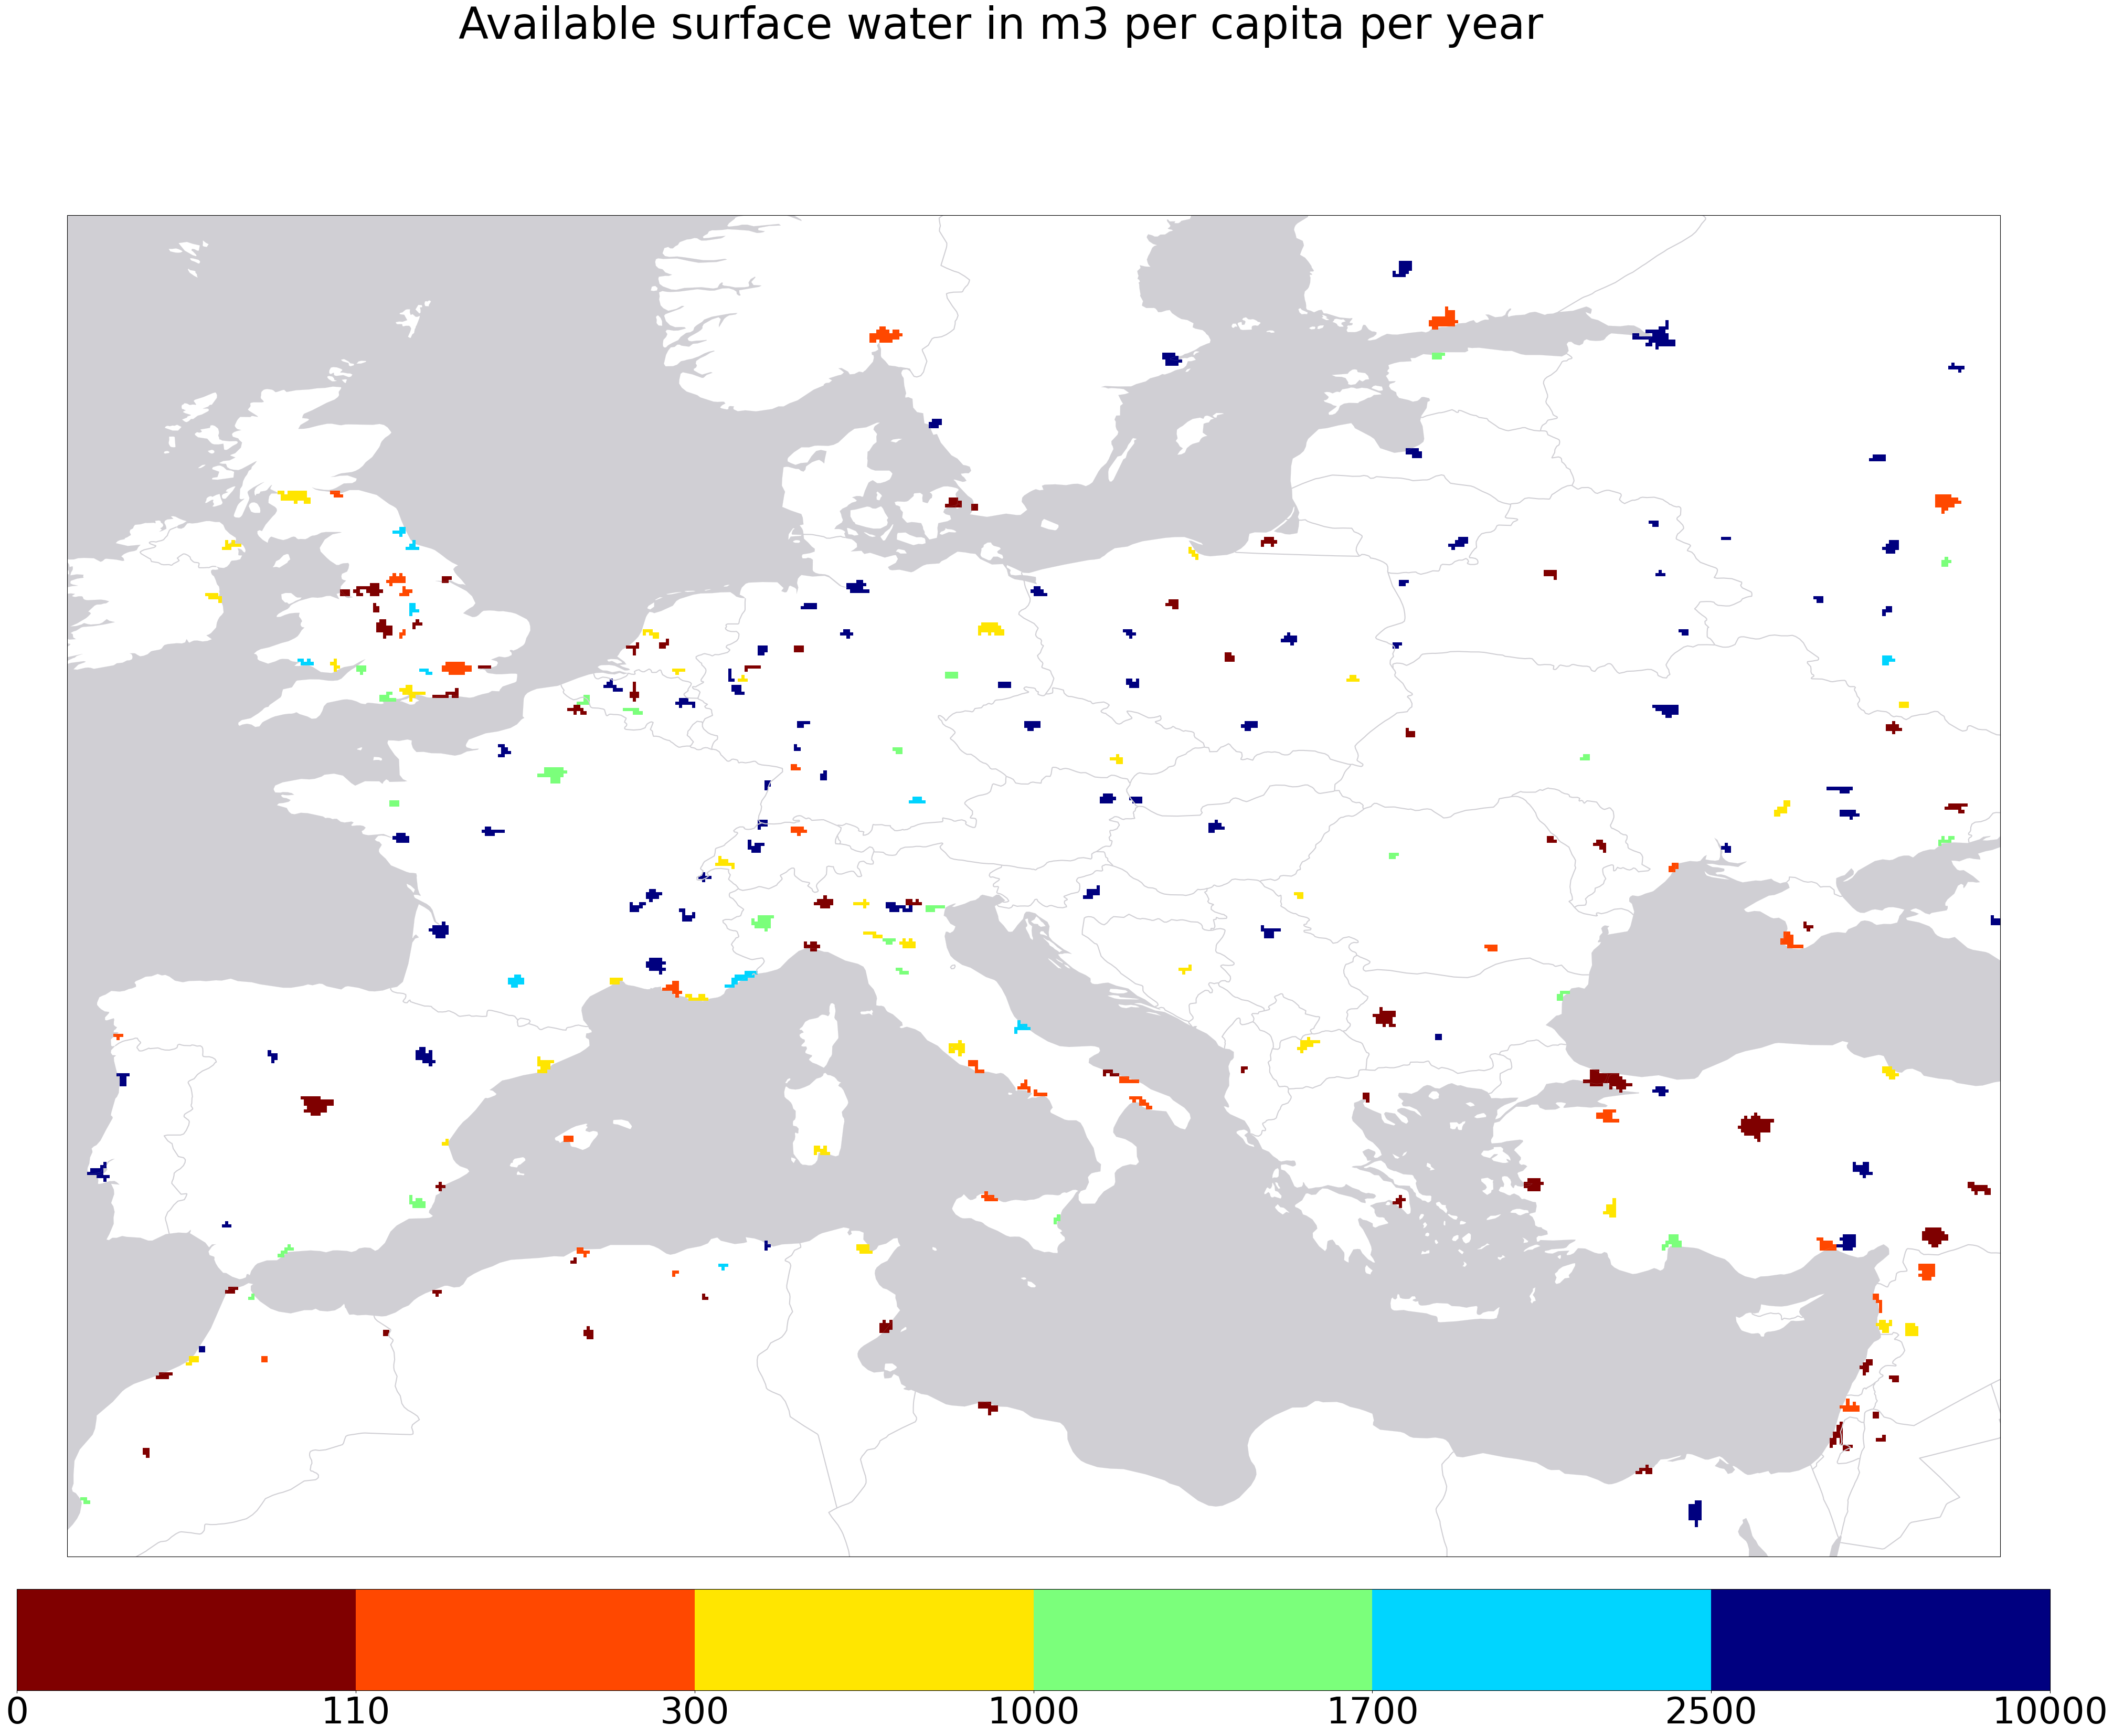

In [5]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-10, 39, 29, 63)
region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 110, 300, 1000, 1700, 2500, 10000]

cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

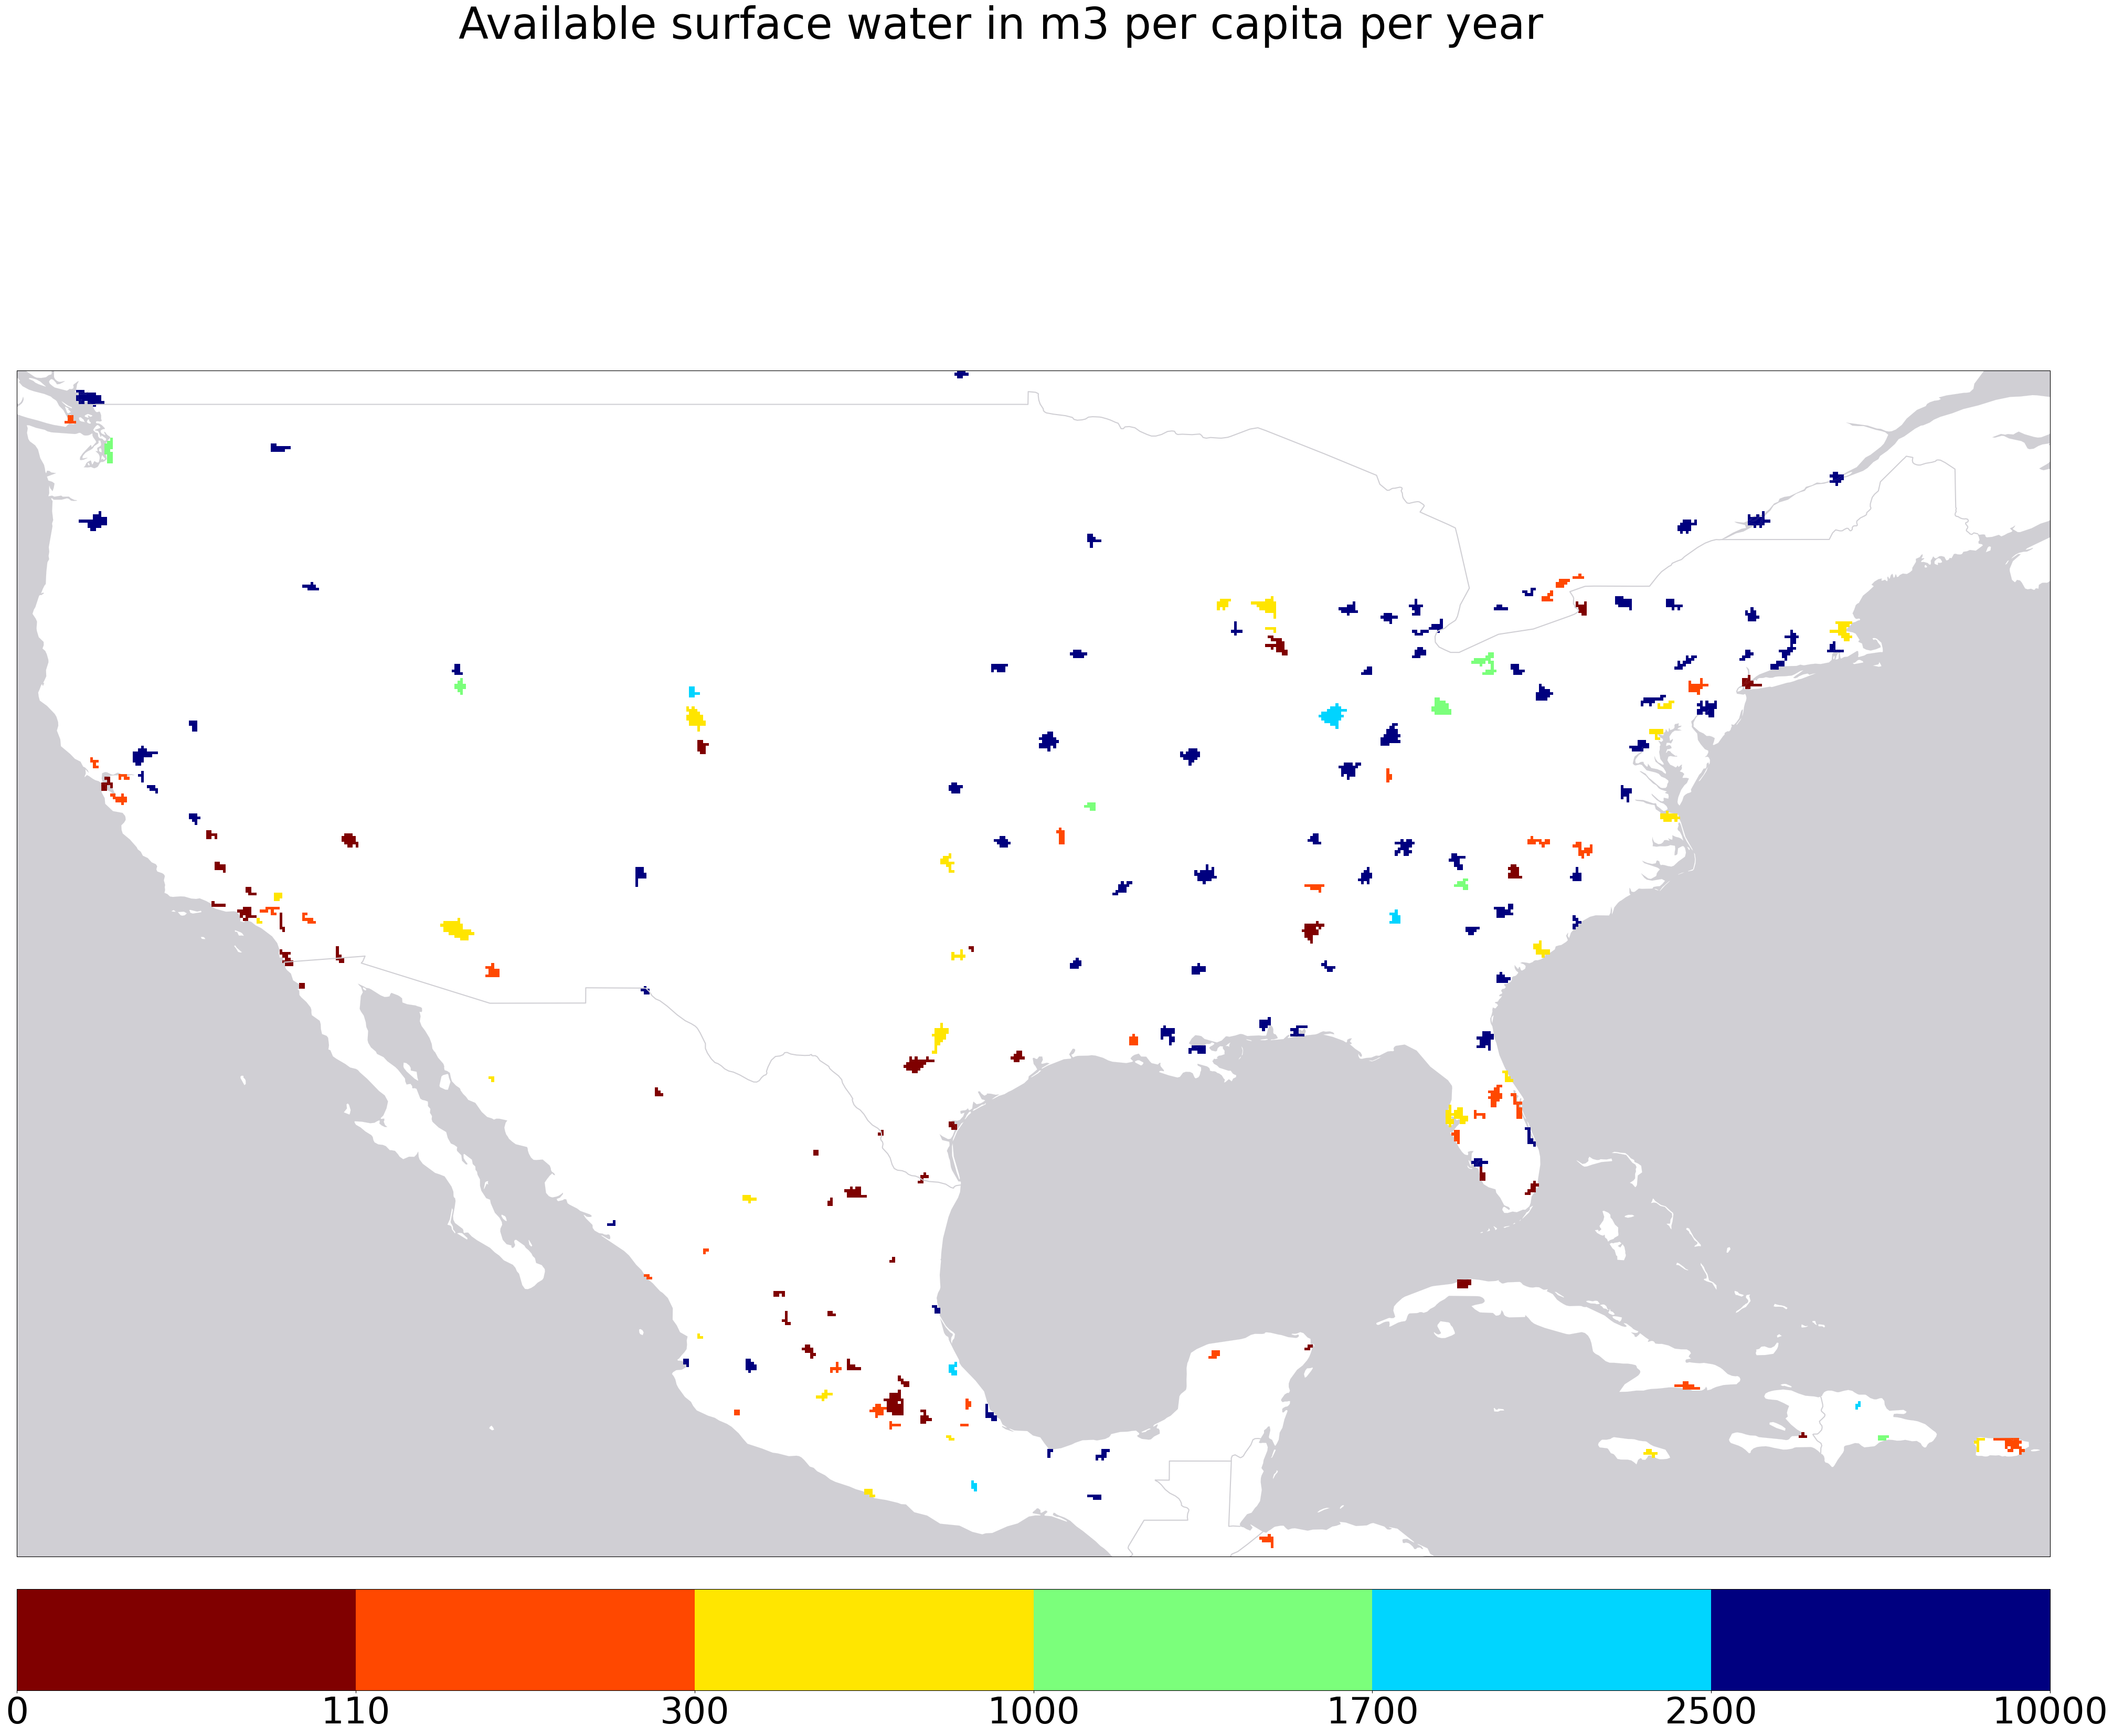

In [7]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-125, -65, 15, 50)
region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 110, 300, 1000, 1700, 2500, 10000]

cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

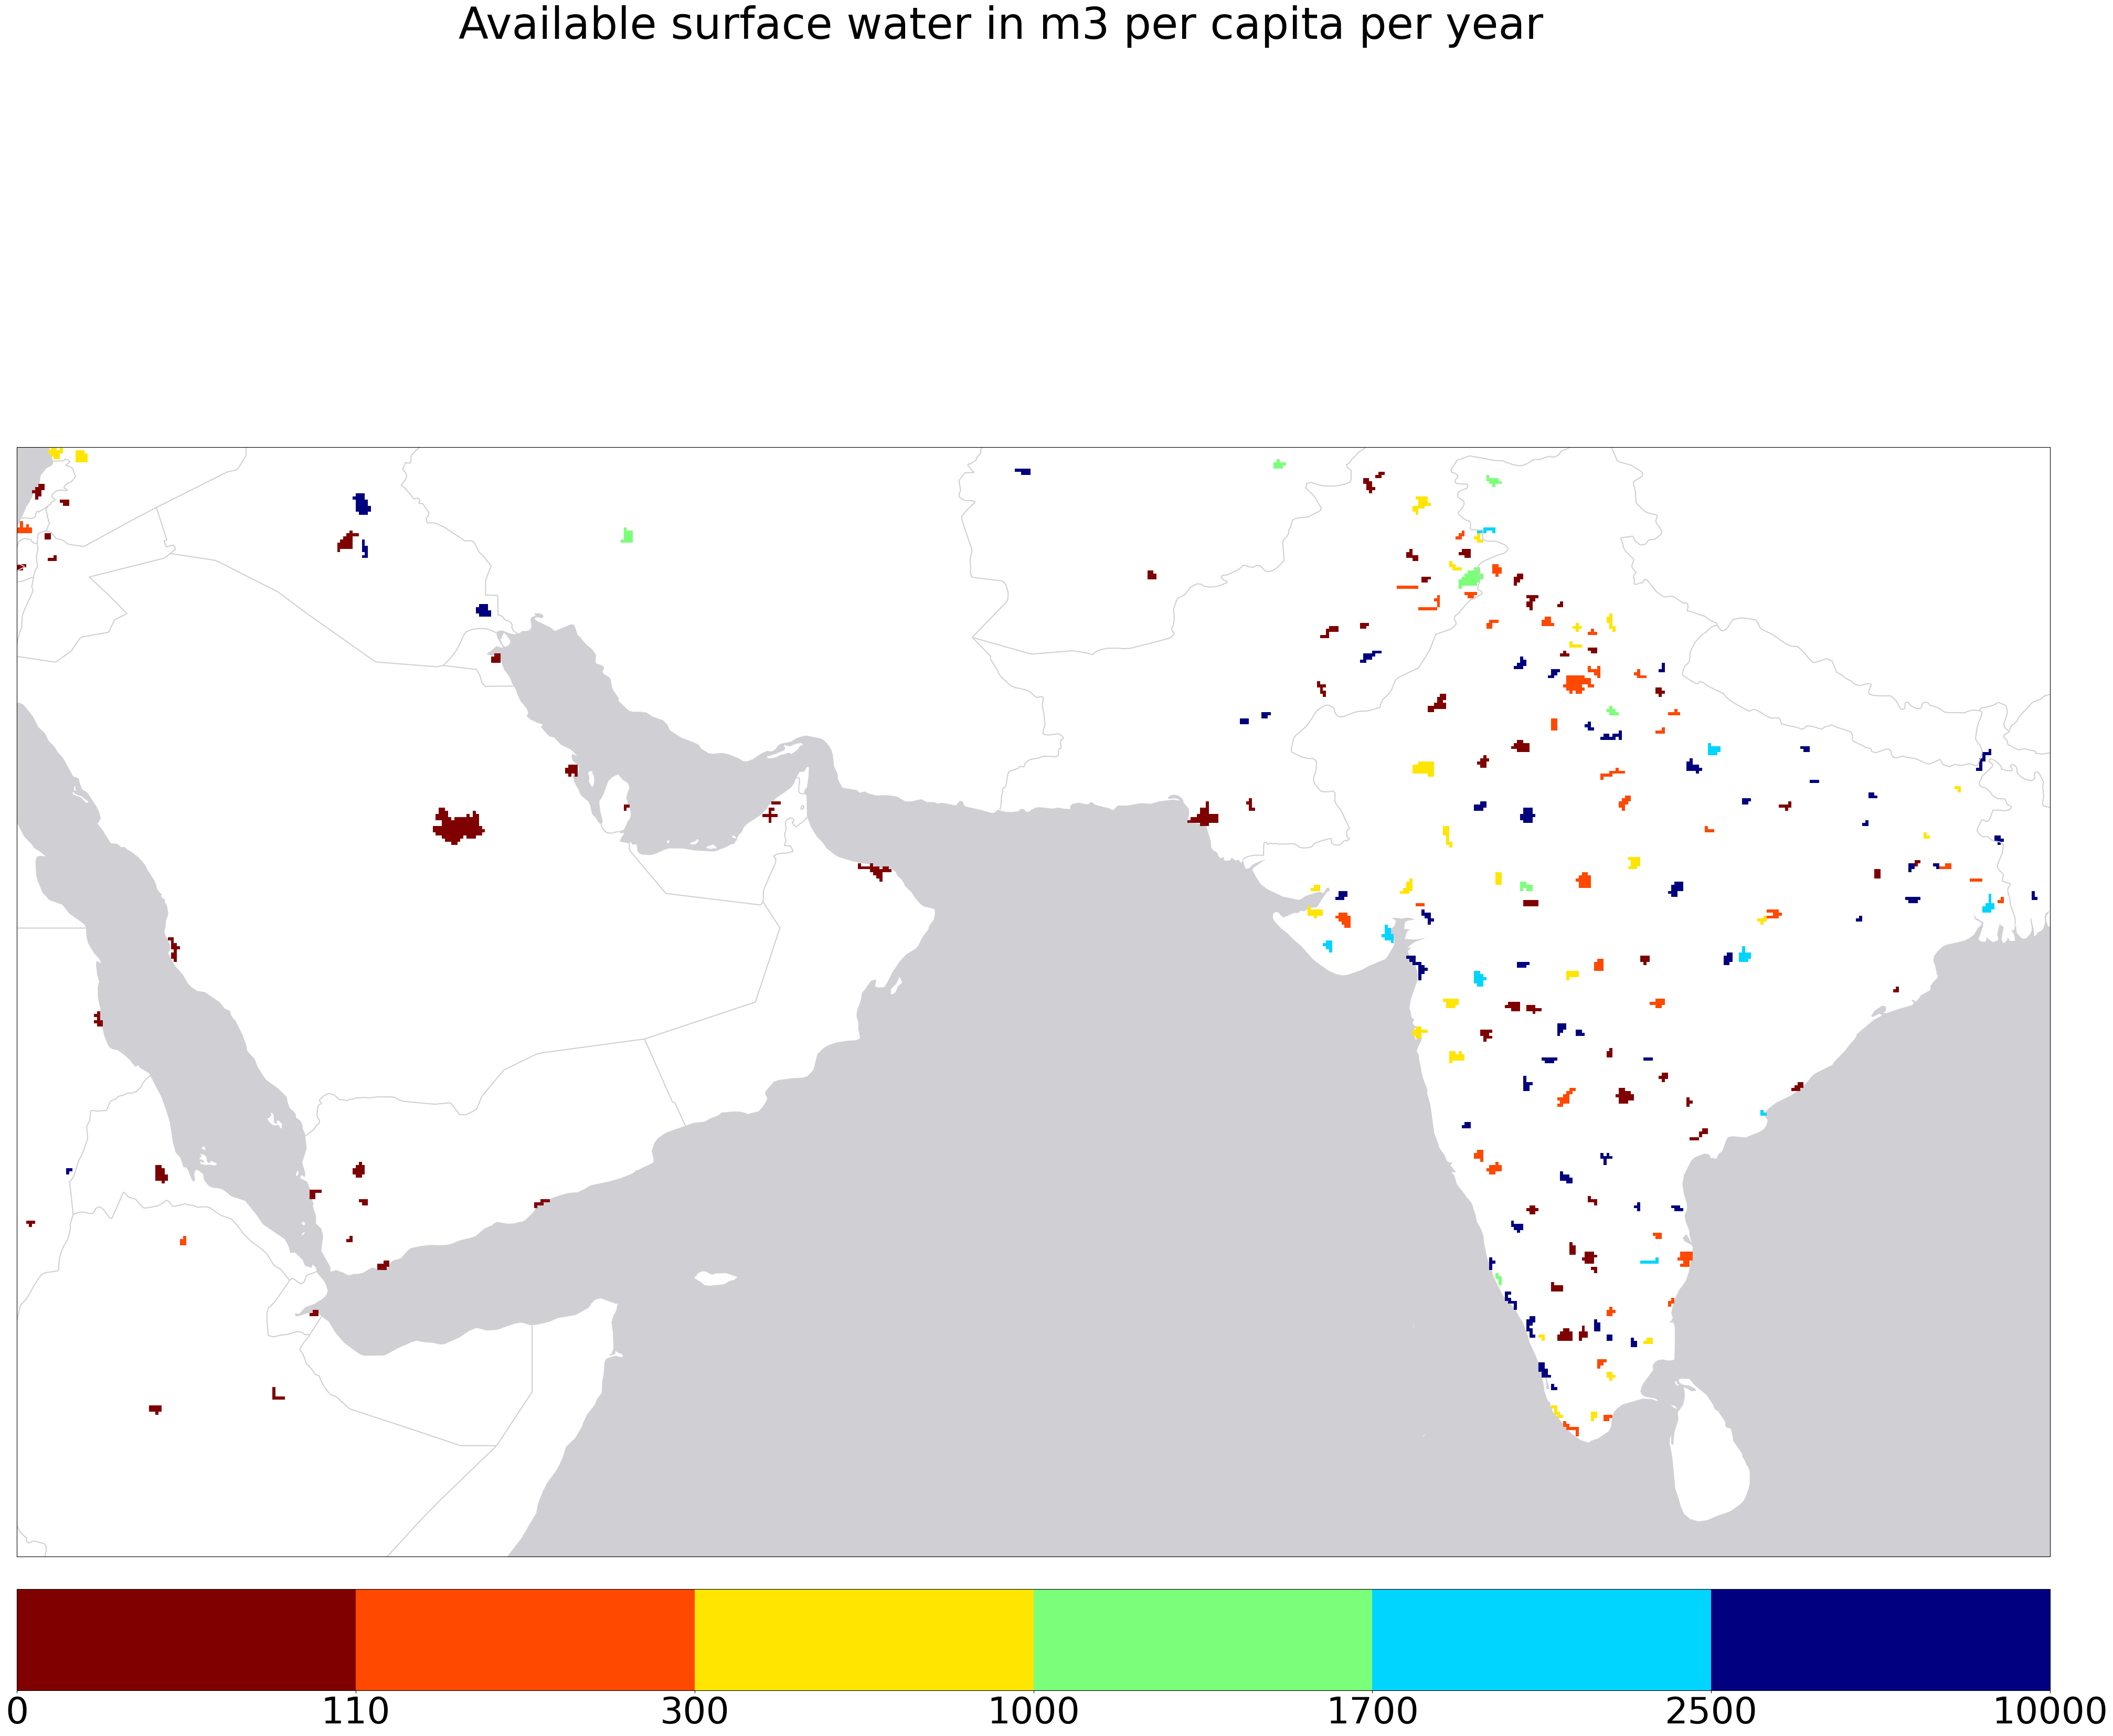

In [8]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(35, 90, 5, 35)
region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 110, 300, 1000, 1700, 2500, 10000]

cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

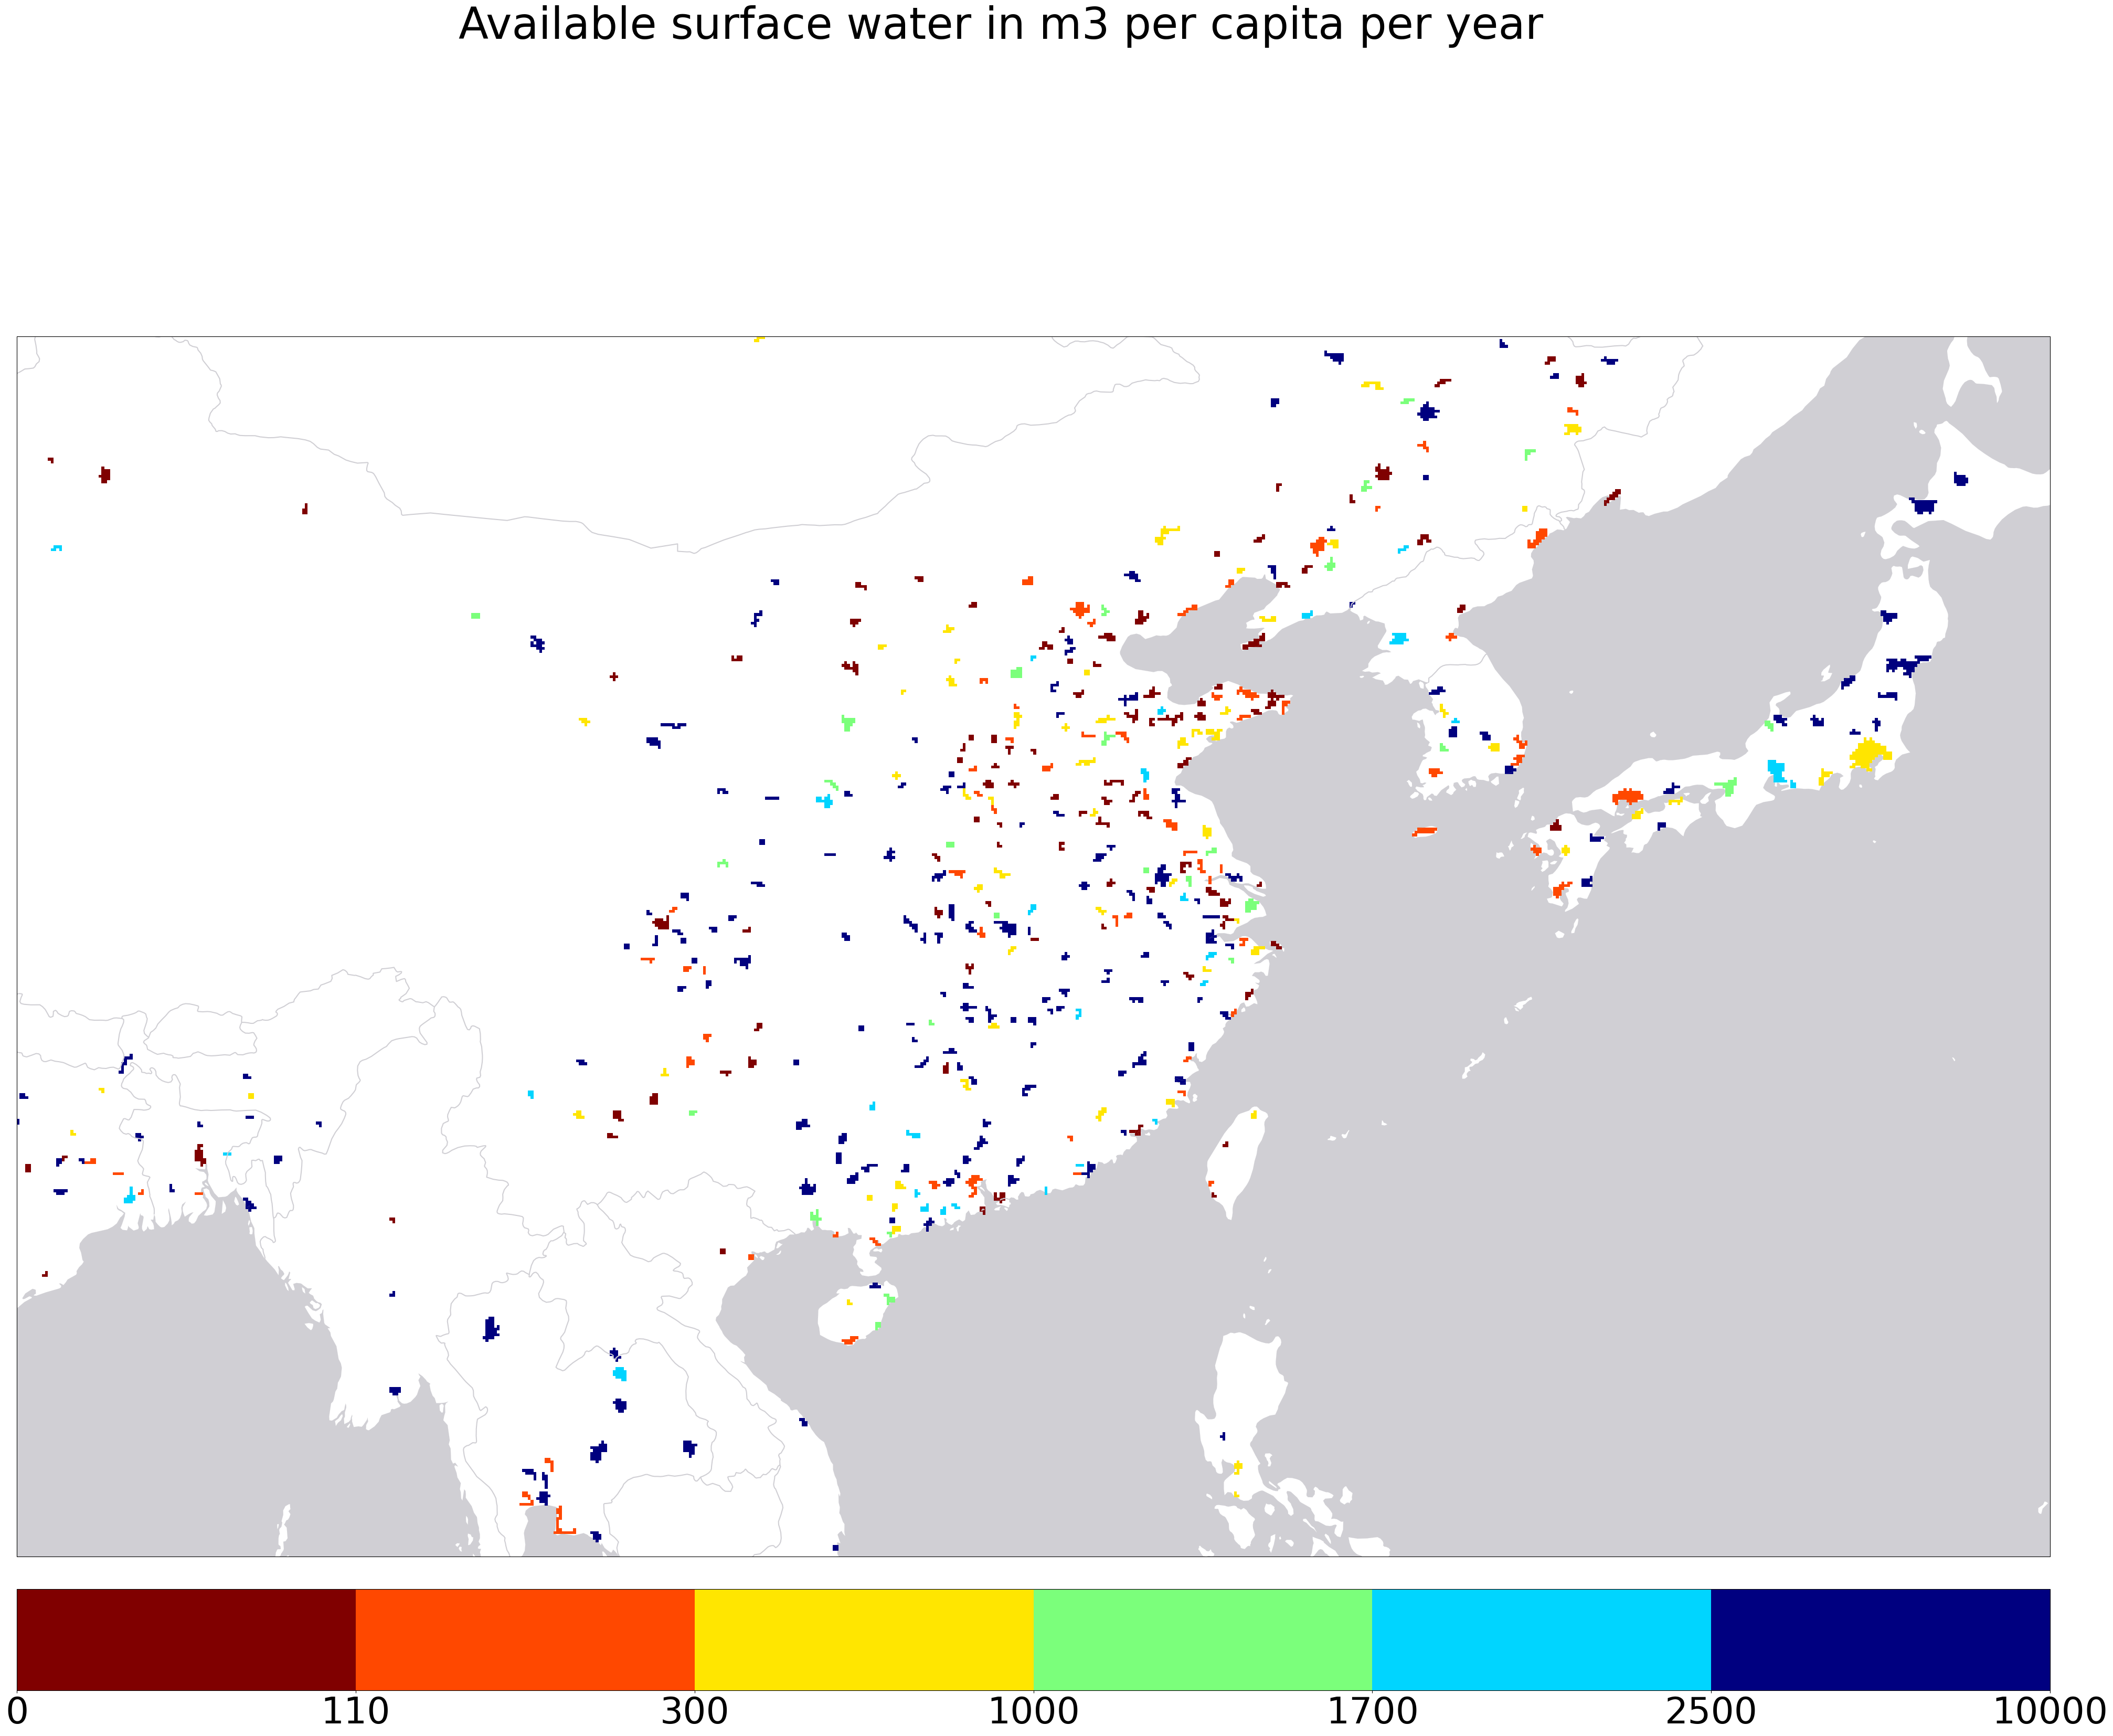

In [9]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(85, 145, 12, 48)

region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 110, 300, 1000, 1700, 2500, 10000]

cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

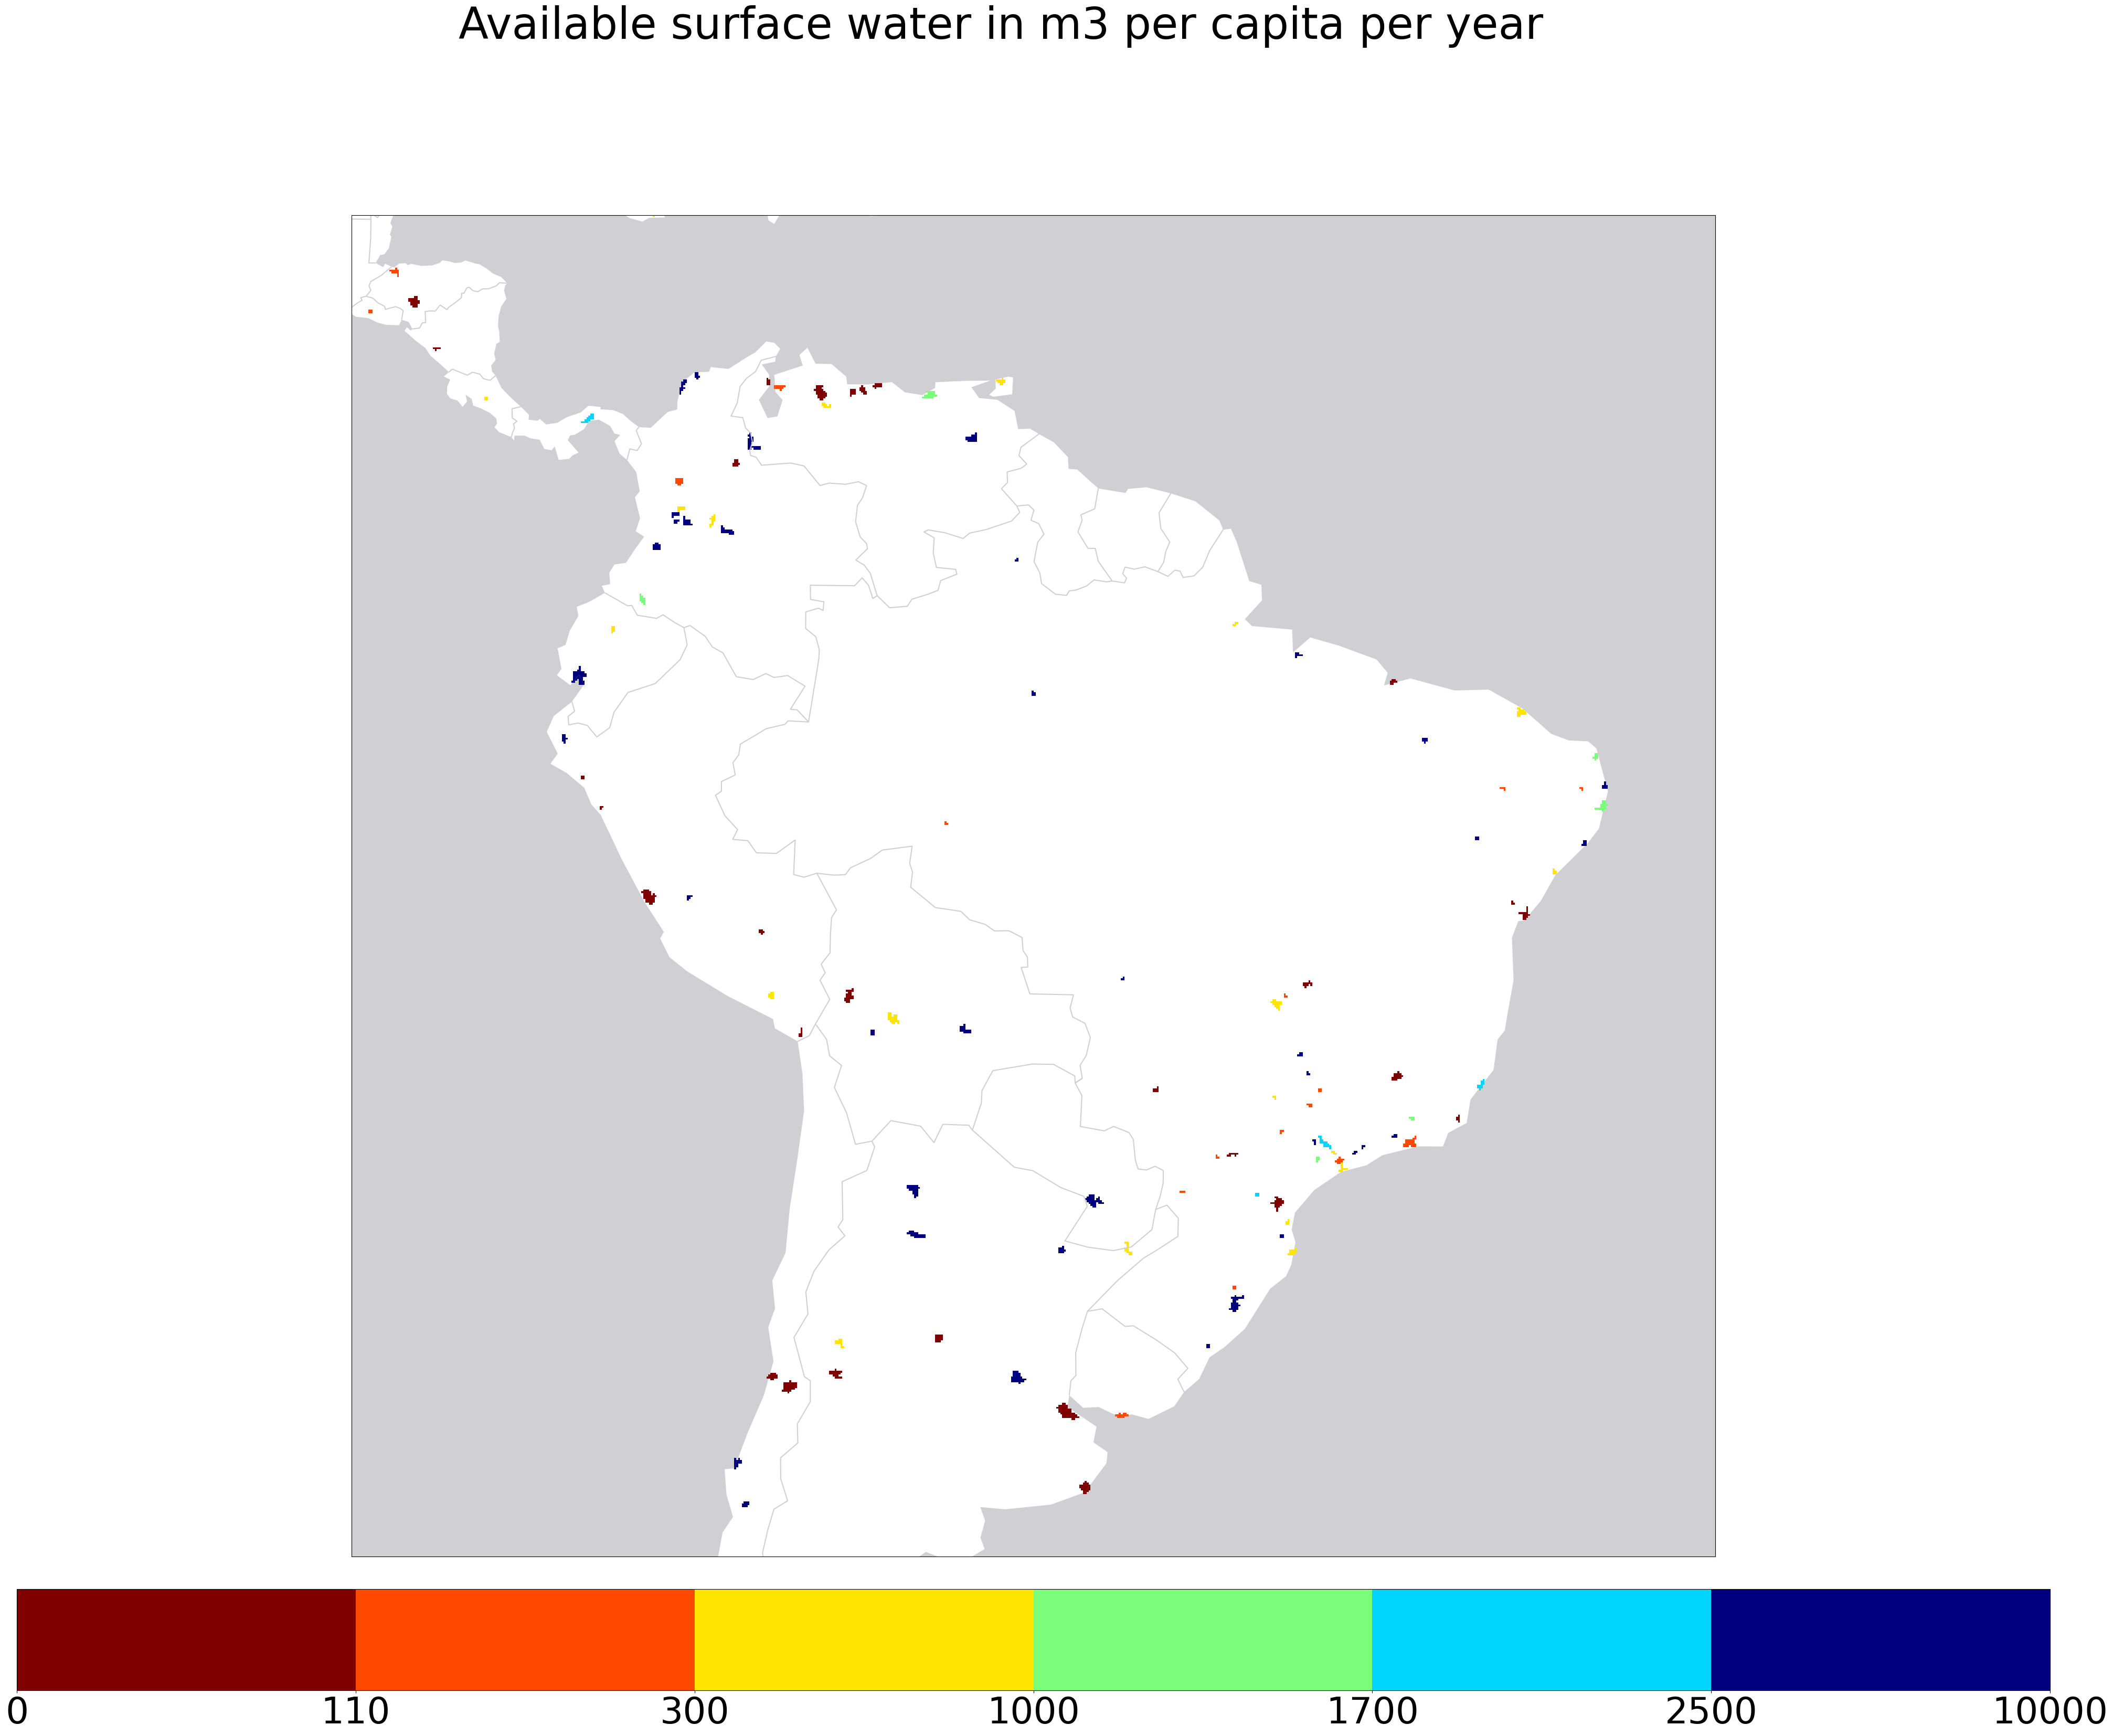

In [10]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-90, -30, -41, 18)

region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 110, 300, 1000, 1700, 2500, 10000]

cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

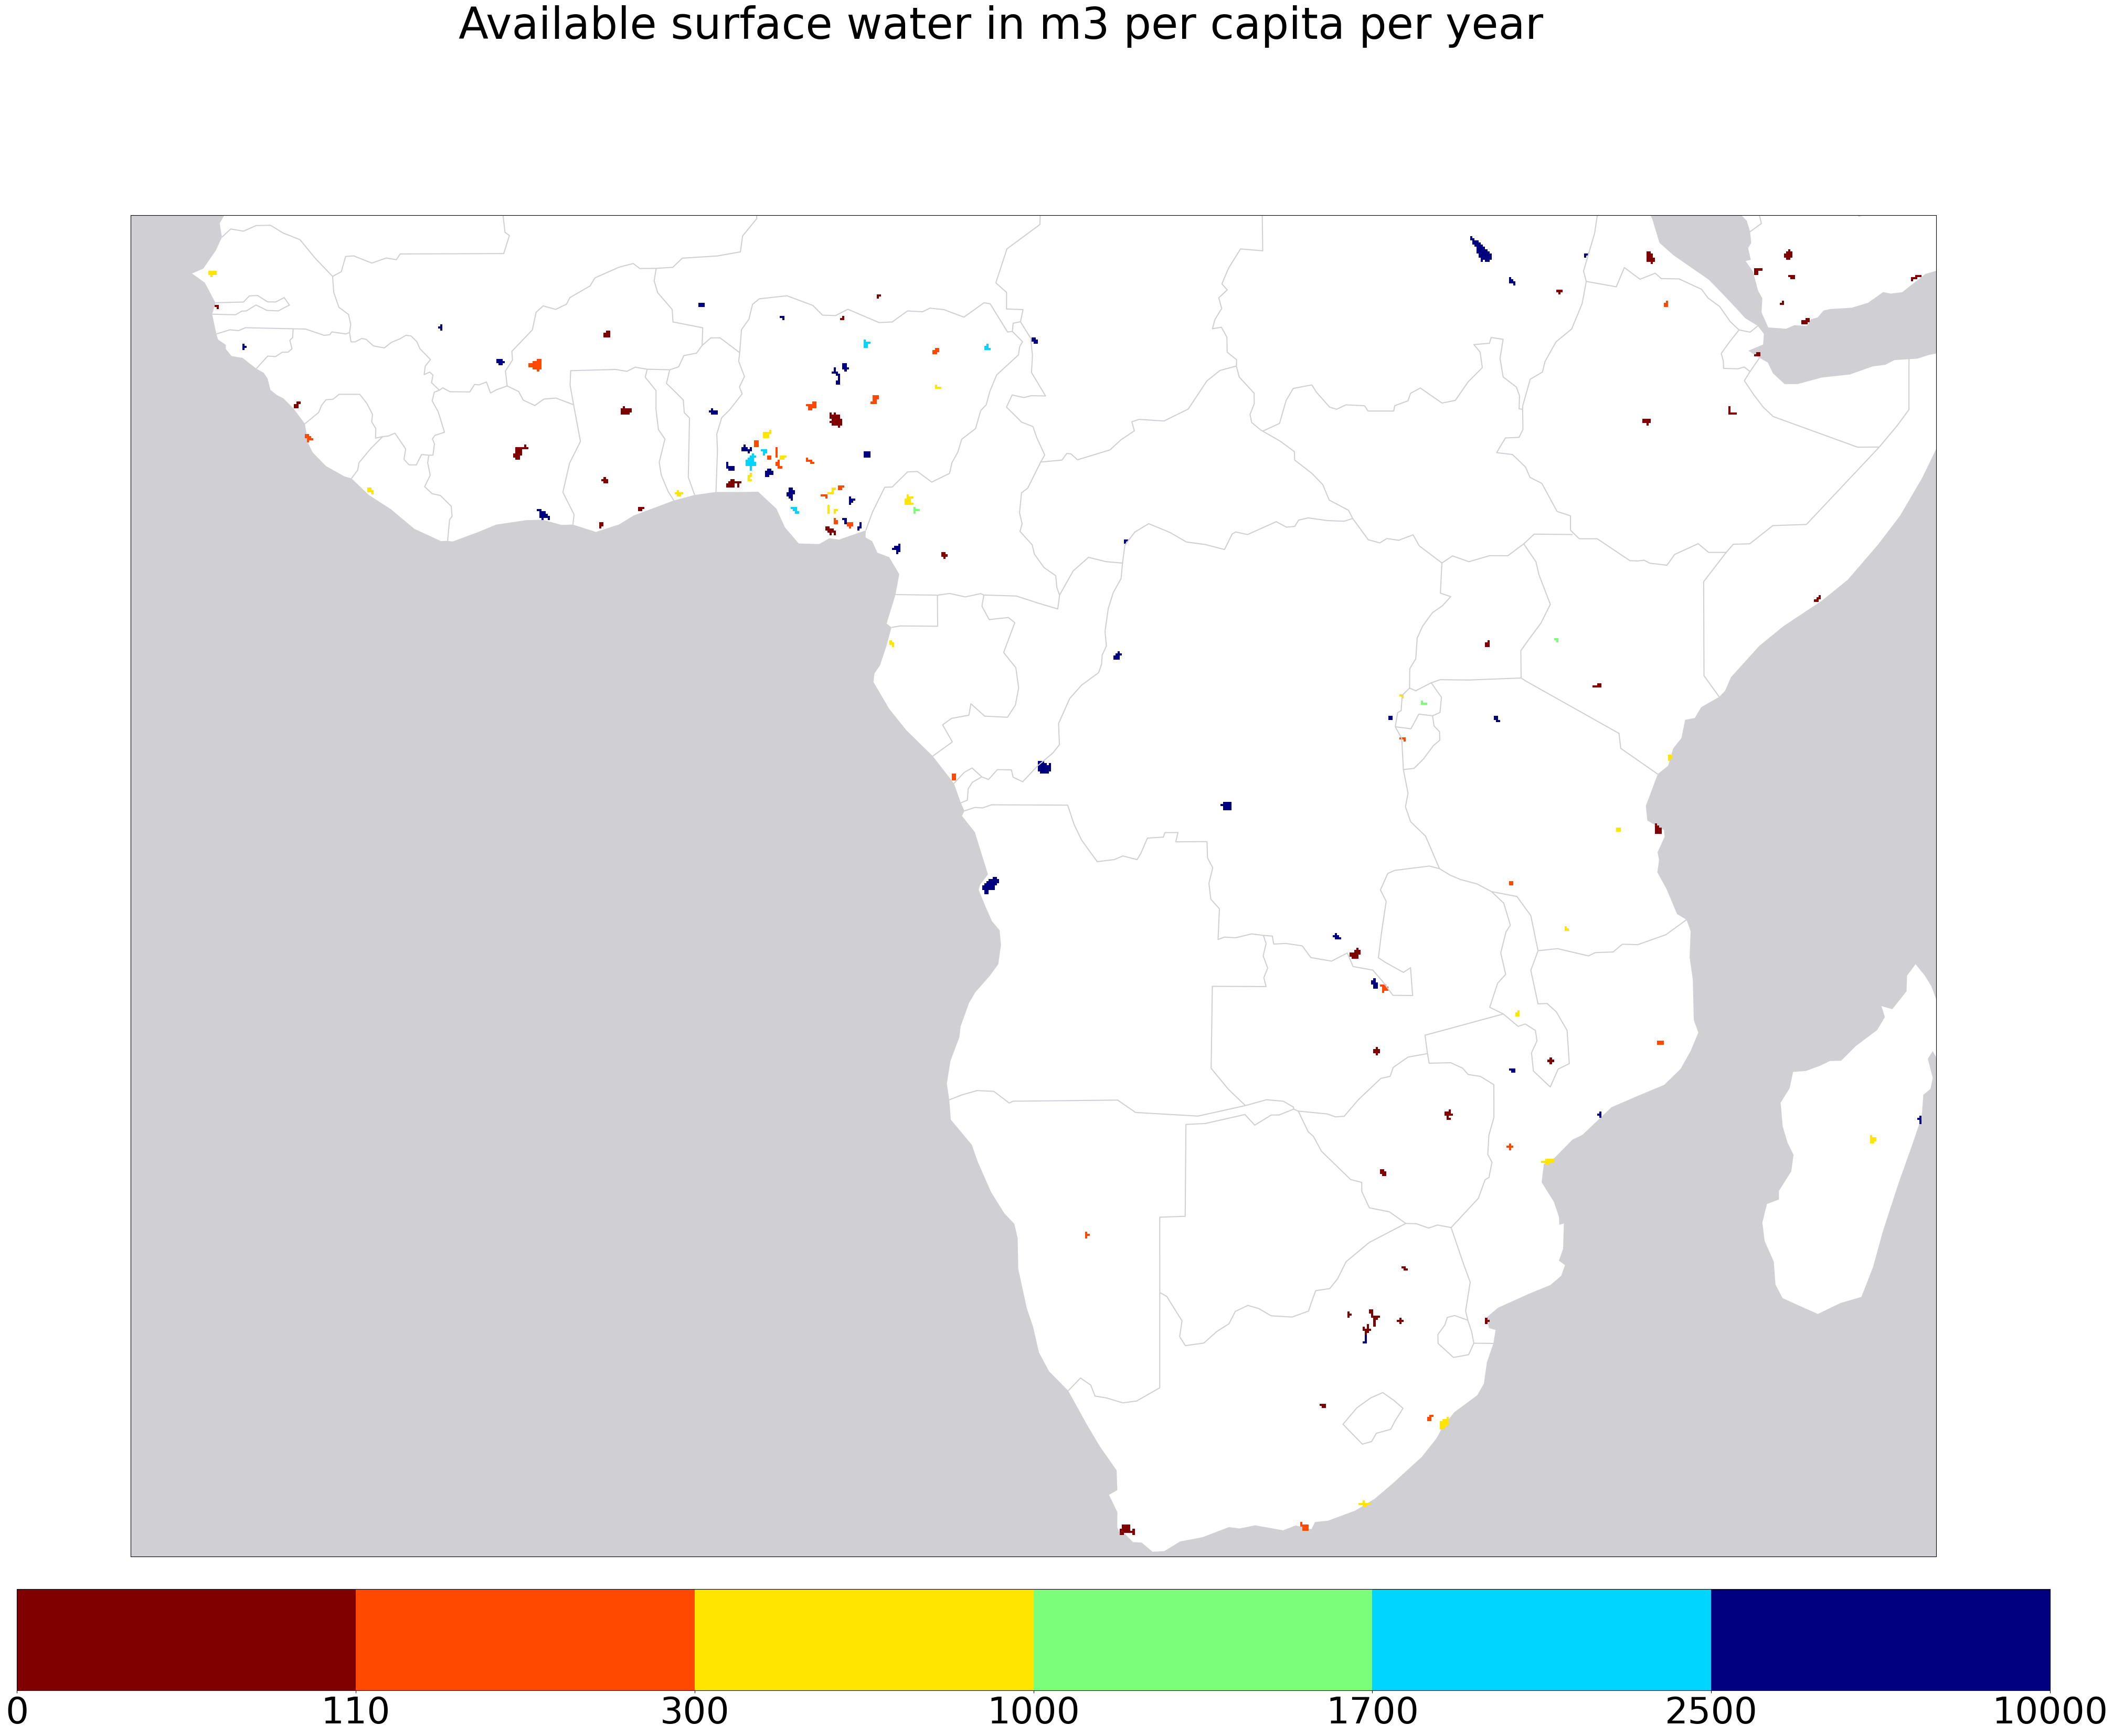

In [11]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-20, 50, -35, 17)

region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 110, 300, 1000, 1700, 2500, 10000]

cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

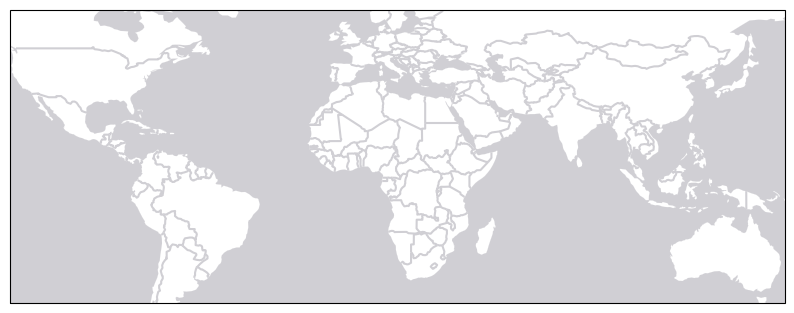

In [12]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-125, 155, -43, 63)

region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 118, 264, 876, 1700, 2500, 10000]

cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

#plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': projection})
imd = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
#cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
#fig.suptitle('Available surface water in m3 per capita per year')
plt.show()